In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
from simple_detector import *
from advanced_detector import CameraPipeline

In [39]:
import logging
logging.basicConfig()
format_ = '%(asctime) - %(message)s'
logger = logging.getLogger('test')
logger.setLevel(logging.DEBUG)

In [40]:
# calibration n test cases
calibration_folder = 'camera_cal'
test_cases = 'test_images'

# Testing

In [41]:
from advanced_detector import hls_select
test_set = glob.glob(test_cases + '/*.jpg')

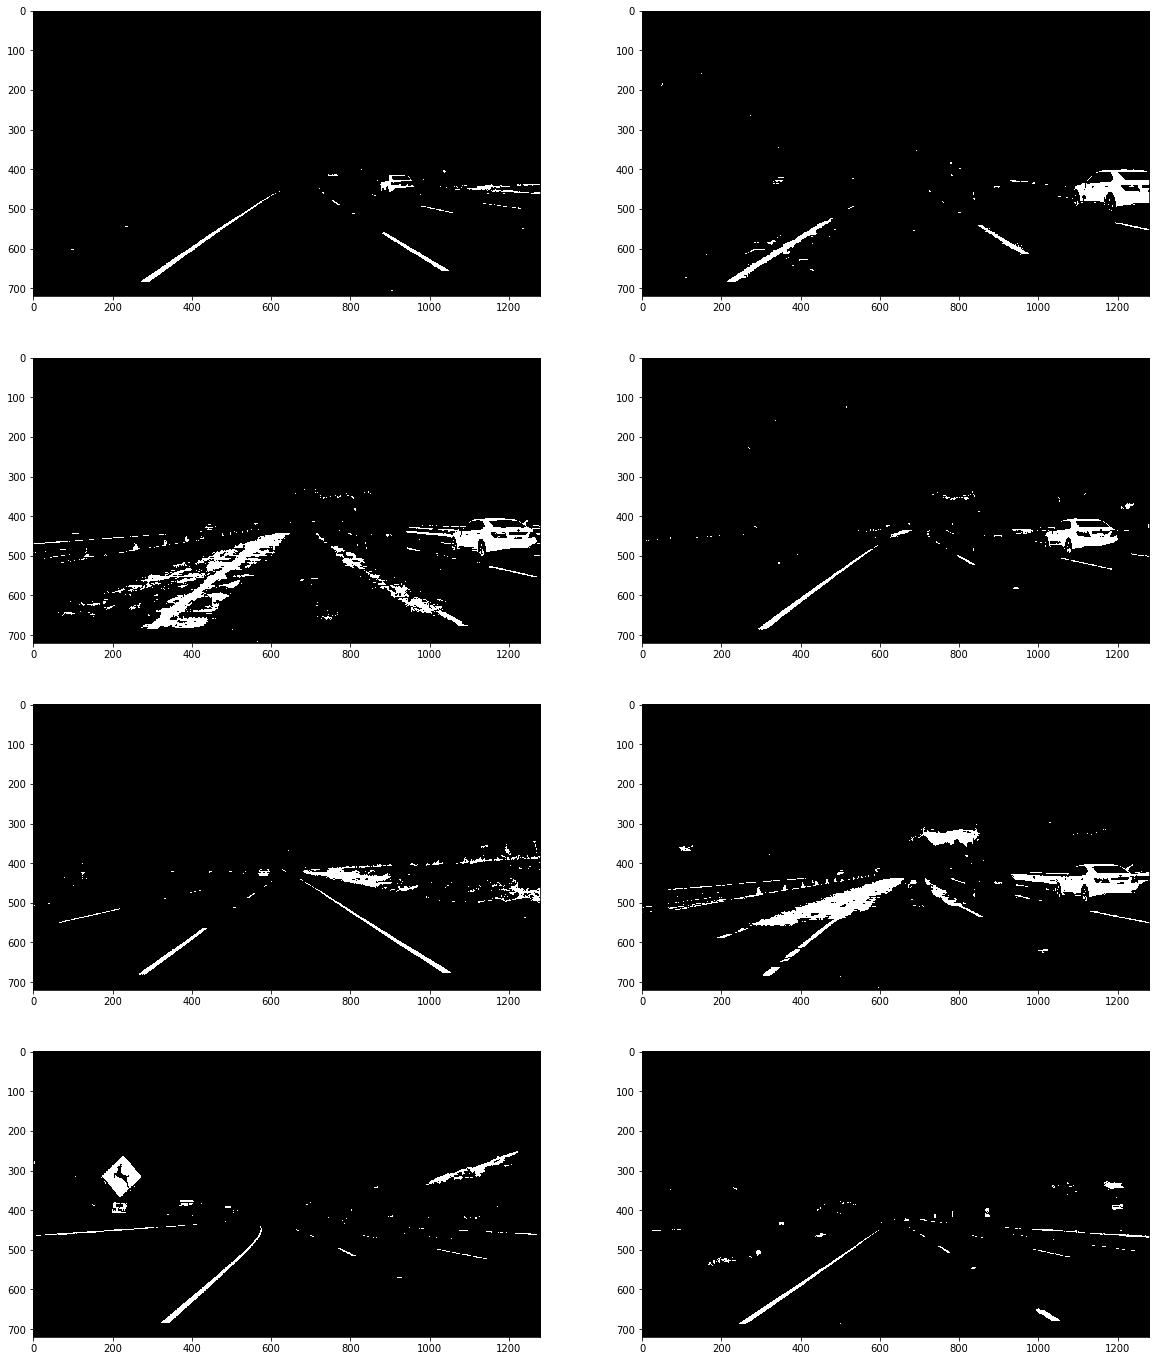

In [52]:
# check filtering

test_length = len(test_set)
plt.figure(figsize=(20,50))
hfd = 0.65
for i in range(0, test_length):

    img, img_size = read_video(test_set[i])
    R = img[:,:, 0]
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]
    
    thresh = (200, 255)
    binary = np.zeros_like(R)
    binary[(R > thresh[0]) & (R <= thresh[1])] = 1
    
    #merged = np.zeros_like[R]
    
    plt.subplot(test_length,2,i+1)
    plt.imshow(binary, cmap='gray', interpolation='none')

In [61]:
def testing_pipeline(img_path, how_far_down):
    
    result, fr_shape = read_video(img_path)
    hls = cv2.cvtColor(result, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]
    thresh = (90, 255)
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    #R = result[:,:,0]
    proc_f = grayscale(result)
    proc_f = gaussian_blur(proc_f, 5)
    proc_f = canny(proc_f, 30, 255)
    roi = region_of_interest(proc_f, np.array([[(0.1*fr_shape[1],fr_shape[0]),
                                            (fr_shape[1]*0.95, fr_shape[0]), 
                                            (0.55*fr_shape[1], how_far_down*fr_shape[0]), 
                                            (0.45*fr_shape[1],how_far_down*fr_shape[0])]], dtype=np.int32))
    proc_f_lines = hough_lines(roi, 2, np.pi/180, 16, 5, 400)
    final_lines = find_lines(proc_f, proc_f_lines)
    
    logger.debug(len(final_lines))
    for line in final_lines:
        x1,y1,x2,y2 = line
        line_grad = np.round(((y2-y1)/(x2-x1)), decimals = 2)
        logger.debug('gradient: {0}'.format(line_grad))
    
    output_img = draw_lines(proc_f, final_lines)
    output_img = weighted_img(output_img, result)
    
    return output_img

DEBUG:test:2
DEBUG:test:gradient: -0.65
DEBUG:test:gradient: 0.39
DEBUG:test:2
DEBUG:test:gradient: -0.6
DEBUG:test:gradient: 0.63
DEBUG:test:2
DEBUG:test:gradient: -0.0
DEBUG:test:gradient: 0.31
DEBUG:test:2
DEBUG:test:gradient: -0.64
DEBUG:test:gradient: 0.63
DEBUG:test:2
DEBUG:test:gradient: -0.69
DEBUG:test:gradient: 0.58
DEBUG:test:2
DEBUG:test:gradient: -0.78
DEBUG:test:gradient: 0.0
DEBUG:test:2
DEBUG:test:gradient: -0.76
DEBUG:test:gradient: 0.0
DEBUG:test:2
DEBUG:test:gradient: -0.65
DEBUG:test:gradient: 0.62


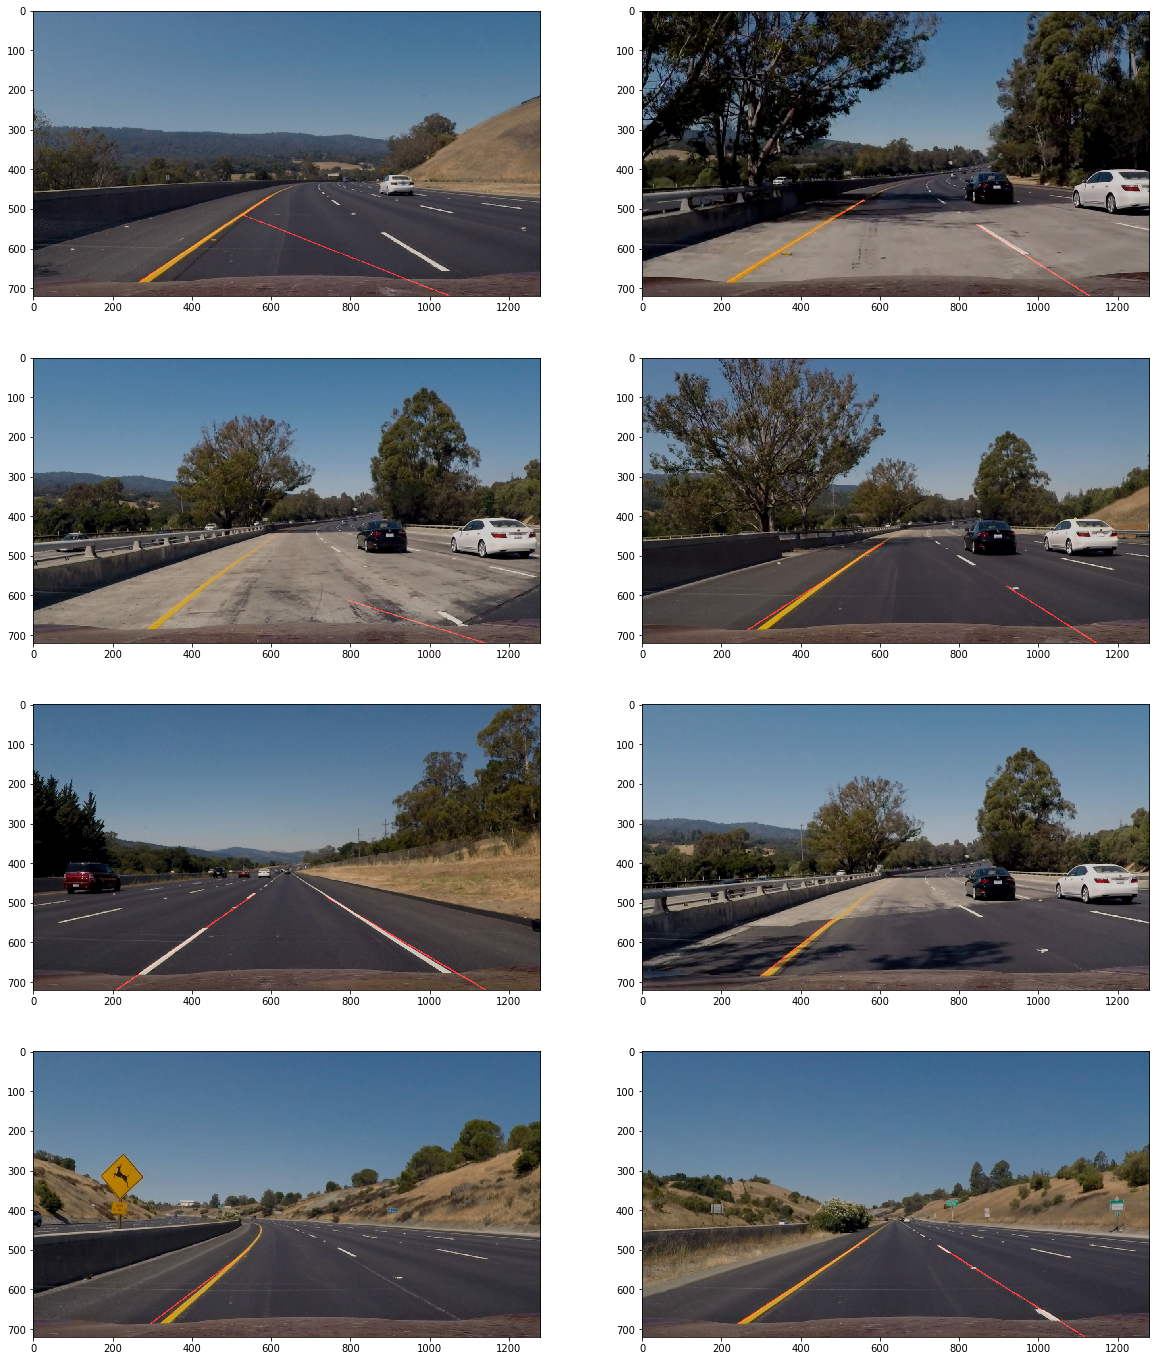

In [62]:
test_length = len(test_set)
plt.figure(figsize=(20,50))
hfd = 0.65
for i in range(0, test_length):

    output_img = testing_pipeline(test_set[i], hfd)
    
    plt.subplot(test_length,2,i+1)
    plt.imshow(output_img, cmap='gray', interpolation='none')

# Calibrate Image First

In [44]:
cal_images = glob.glob(calibration_folder + '/*.jpg')

In [45]:
process_cam = CameraPipeline(9,6)
process_cam.calibrate_cam(cal_images)

# Run on Test

In [46]:
test_set = glob.glob(test_cases + '/*.jpg')

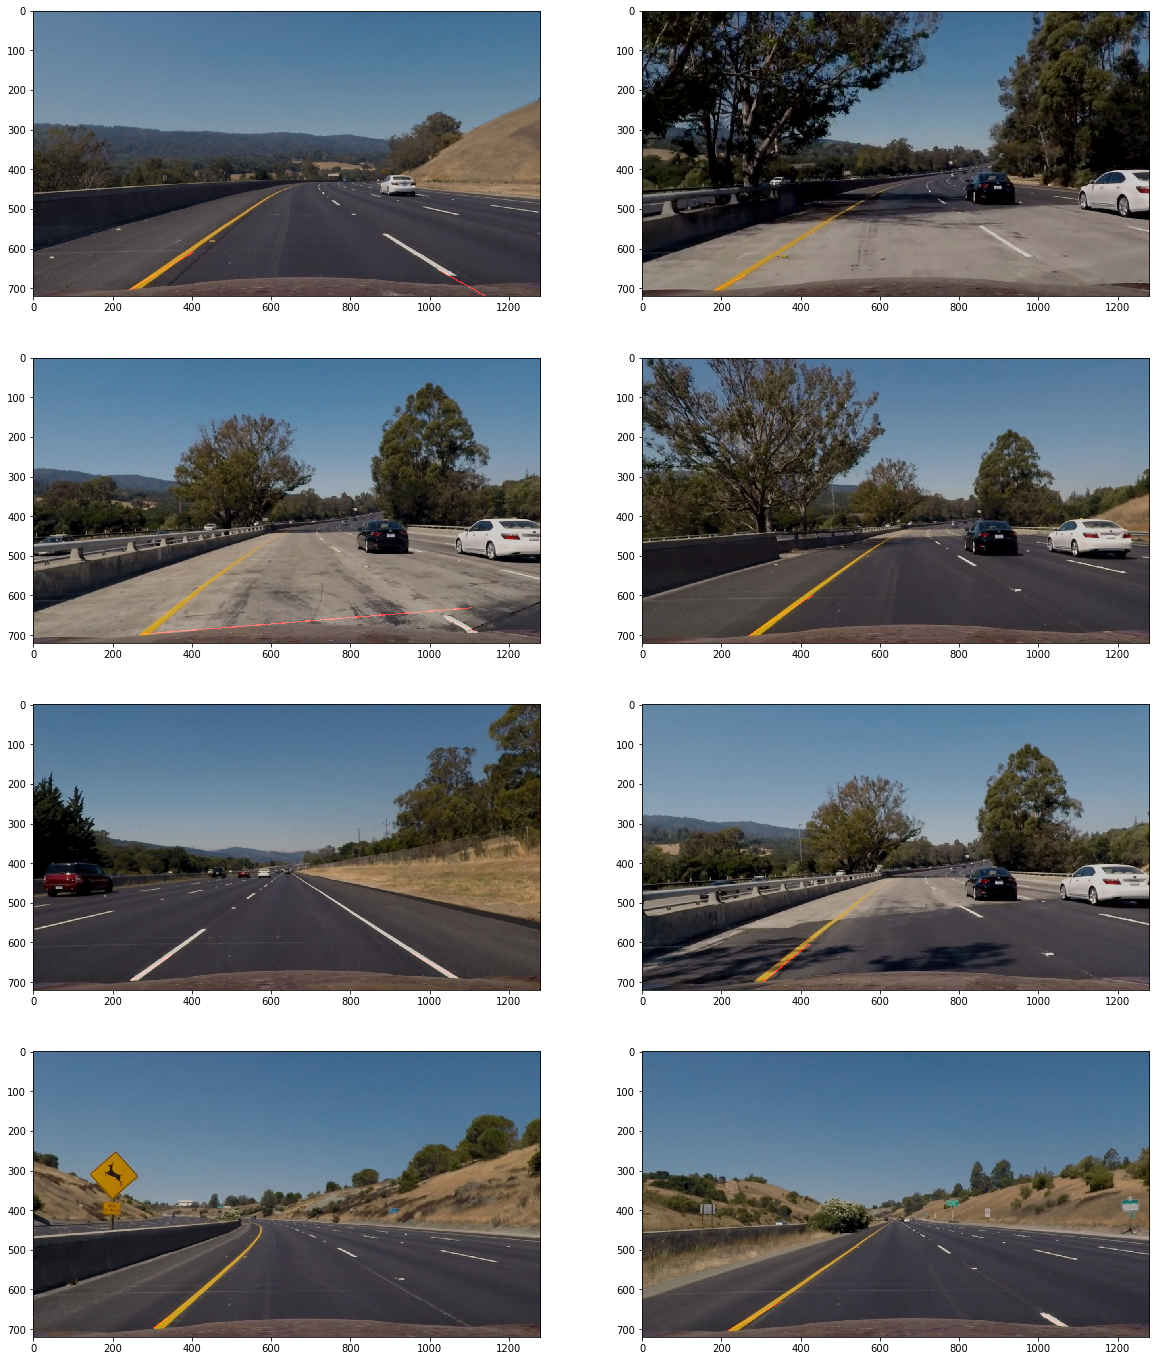

In [47]:
test_length = len(test_set)
plt.figure(figsize=(20,50))
for i in range(0, test_length):
    #logger.info(print(test_pack[i]))
    result = process_cam.process(test_set[i])    
    
    plt.subplot(test_length,2,i+1)
    plt.imshow(result, cmap='gray', interpolation='none')